In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())



!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!mkdir images

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-264hgbas
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-264hgbas
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=bee13621a20f4ee27f4ebe3e0518eb1d09507cd59e6f97f9719a17985af5c1ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-fn4an0af/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
mkdir: cannot create directory ‘images’: File exists
--2023-07-11 13:21:37--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.f

In [5]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from google.colab.patches import cv2_imshow

In [37]:
base_path_img = "MY_PATH"
imgs_list = os.listdir(base_path_img)
imgs_list = [os.path.join(base_path_img, img) for img in imgs_list]

random_image = random.randint(0, len(imgs_list))
image_path = imgs_list[random_image]

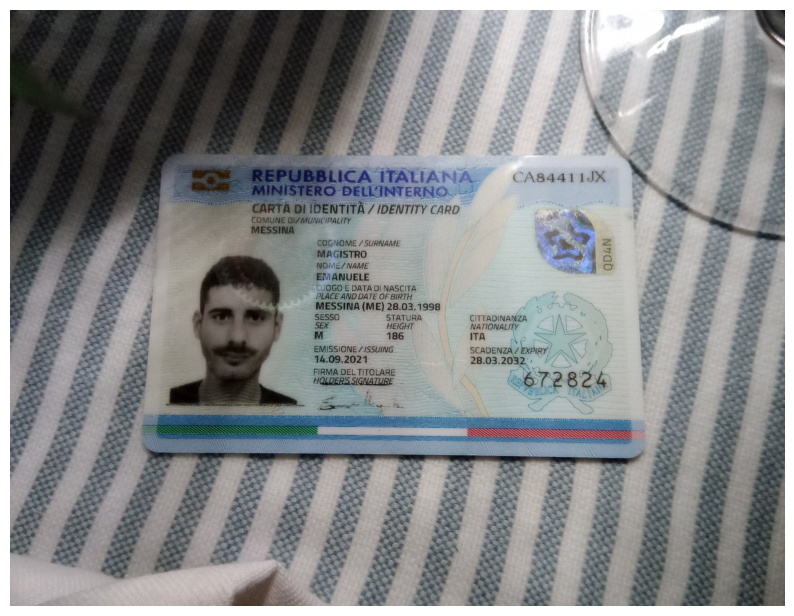

In [44]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [39]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda" # device GPU

# A SAM model instance is created, initialized using the path to sam_checkpoint
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# Instantiating the mask generator
mask_generator = SamAutomaticMaskGenerator(sam)

In [40]:
def show_anns(anns):
    if len(anns) == 0:
        return

    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)

    # Find the maximum size among all masks
    max_shape = max([ann['segmentation'].shape for ann in anns])

    # Initialize RGBA image with all pixels transparent
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4)) # Creates a three-dimensional matrix of zeros

    # Take channel 3 or the fourth in (R,G,B,A) which is alpha and set it to 0, or make all the pixels transparent
    img[:, :, 3] = 0


    for ann in anns:
        # Get mask with key 'segmentation'
        m = ann['segmentation']

        # Calculate the random color for the mask
        color_mask = [np.random.random(3)]


        # Assign the color to the mask
        img[: m.shape[0], : m.shape[1], :3][m] = color_mask
        img[: m.shape[0], : m.shape[1], 3][m] = 0.35


    # Show colored masks, hide x and y axis
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [41]:
# Generation of all masks of the image
masks = mask_generator.generate(image)

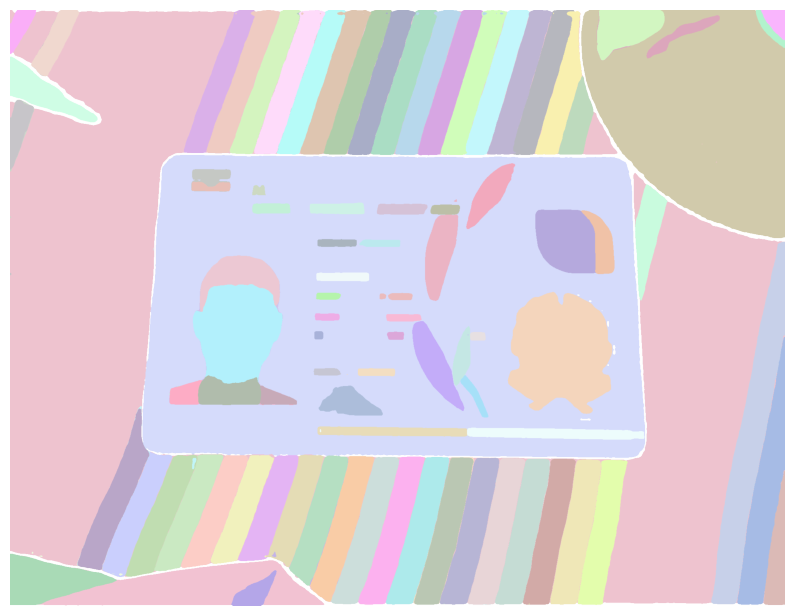

In [46]:
# Show all masks overlaid
plt.figure(figsize=(10,10))
show_anns(masks)

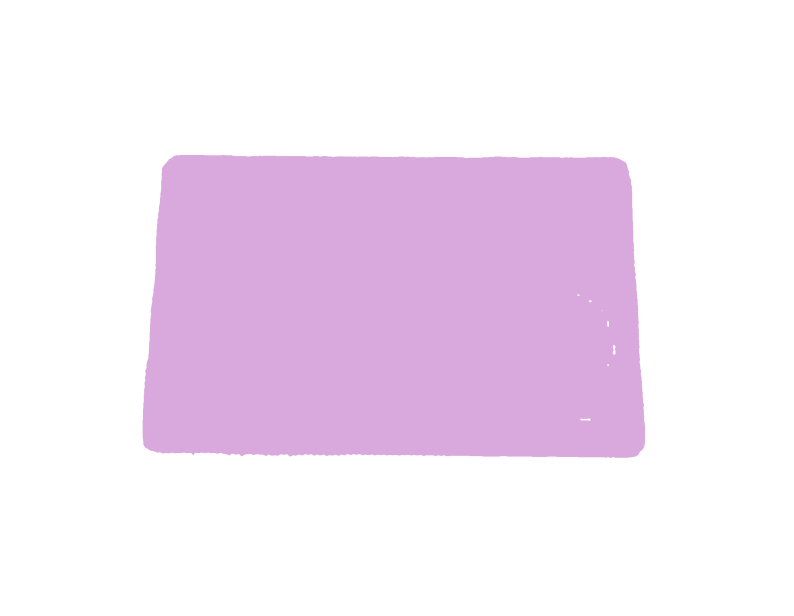

In [47]:
# Show the mask of the document
list_of_masks = list(masks)
plt.figure(figsize=(10,10))
show_anns([list_of_masks[0]])

In [52]:
def show_anns_black_and_white(anns):
    if len(anns) == 0:
        return

    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)

    max_shape = max([ann['segmentation'].shape for ann in anns])

   # Initialize the image with the black background
    img = np.zeros((max_shape[0], max_shape[1], 3), dtype=np.uint8)

    for ann in anns:
        m = ann['segmentation']

        # Assign white color to the mask
        img[m] = [255, 255, 255]

    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

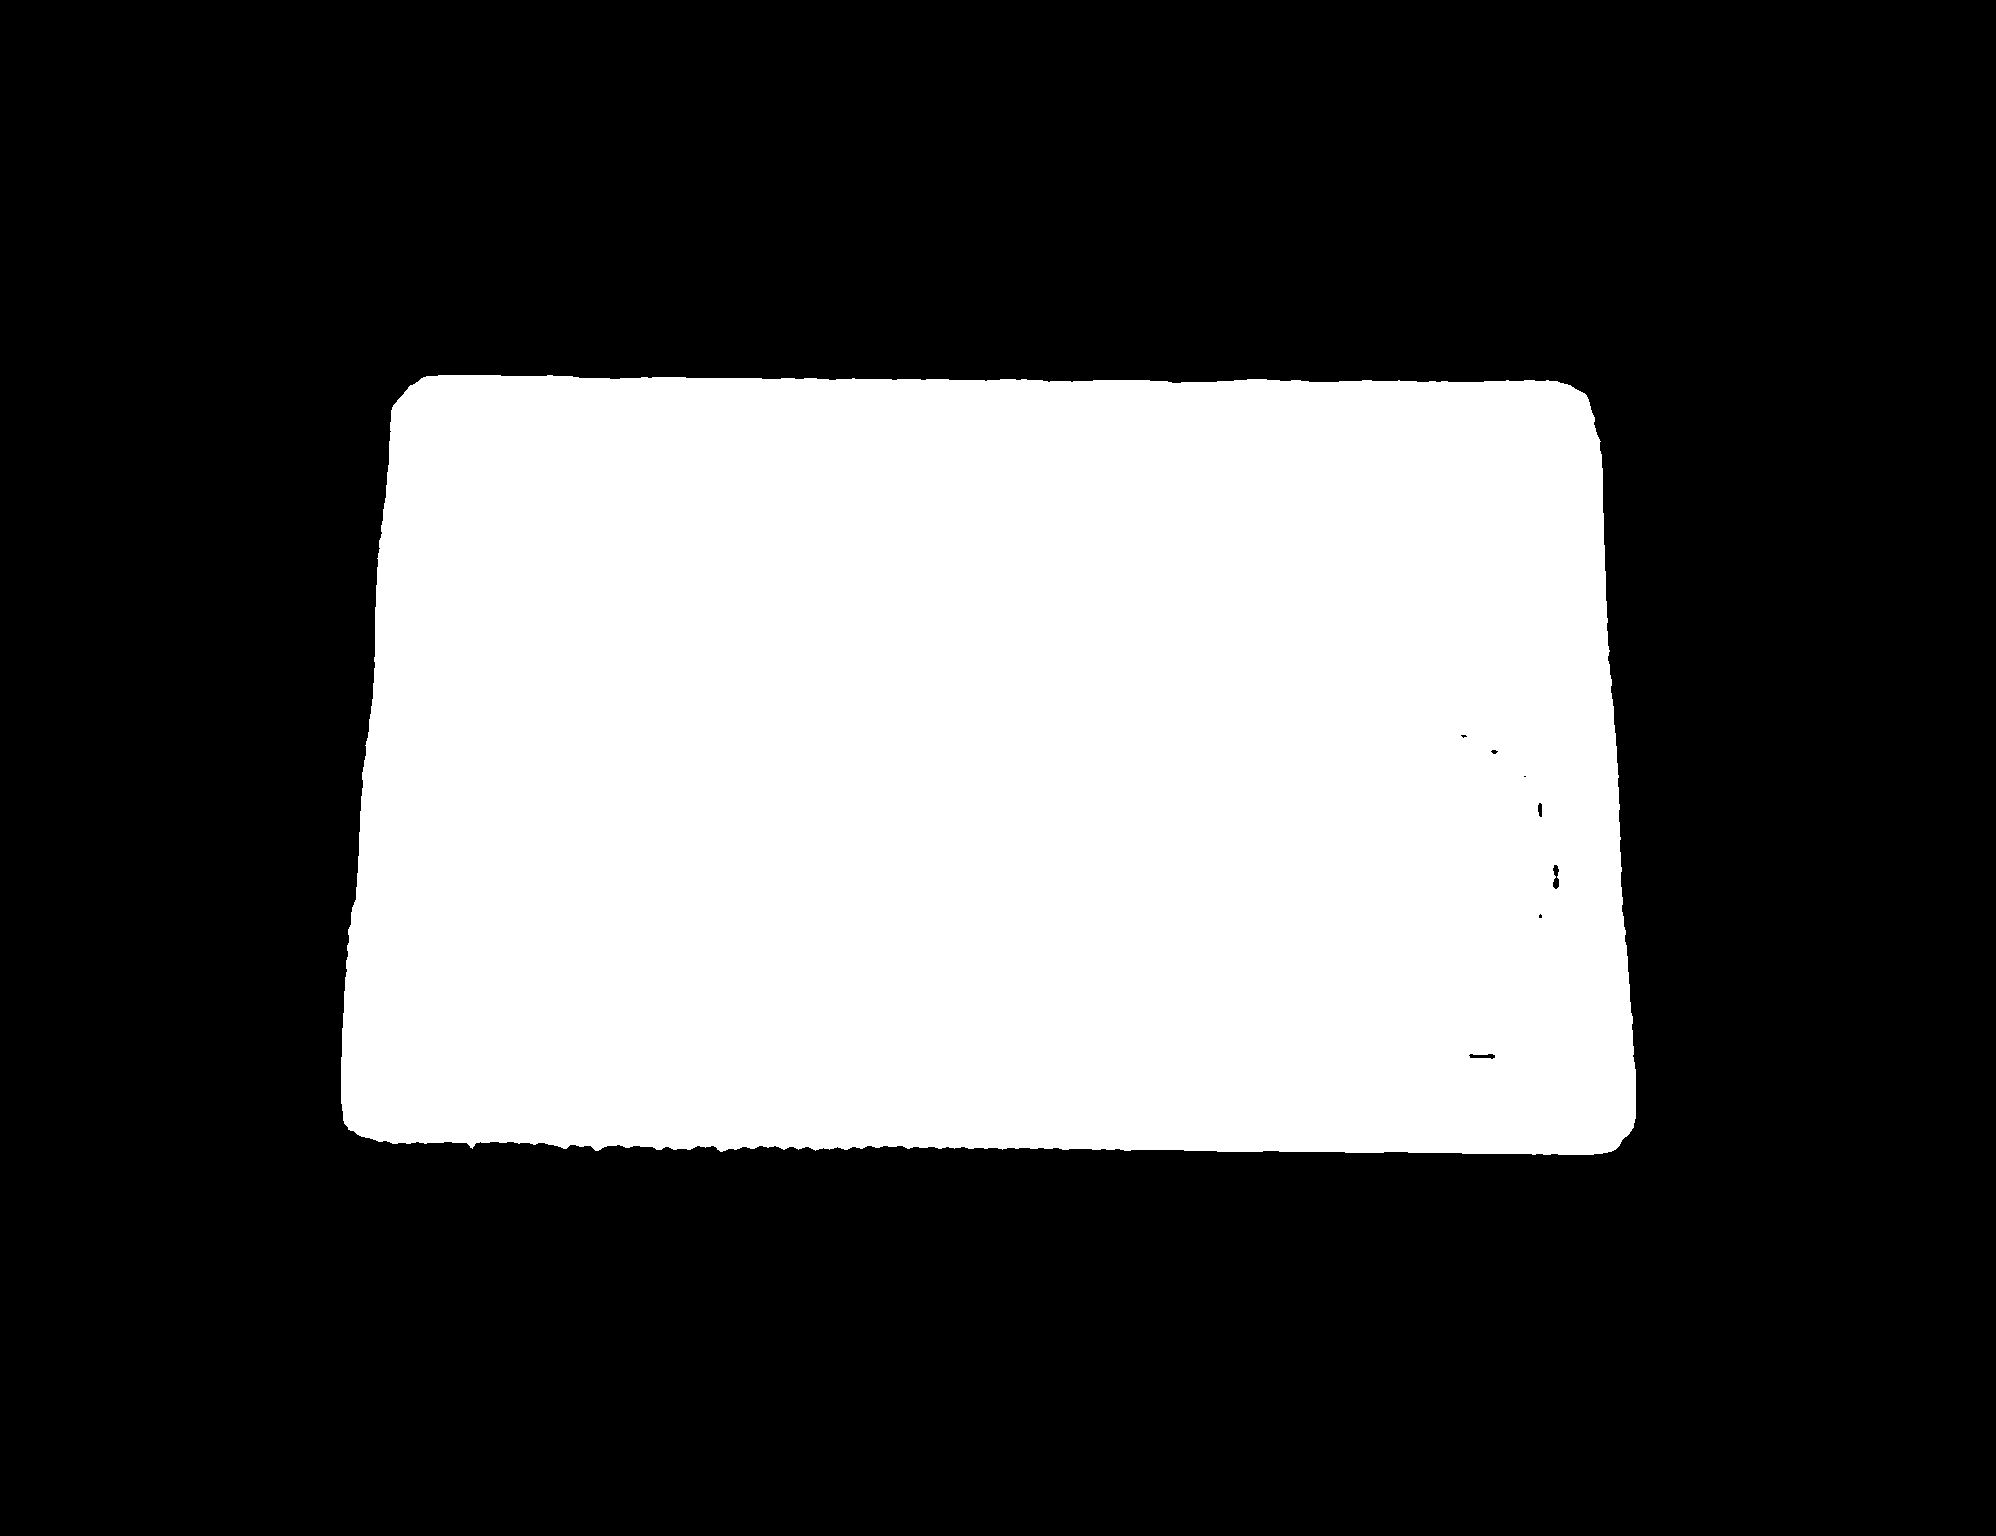

<Figure size 1000x1000 with 0 Axes>

In [54]:
list_of_masks = list(masks)
plt.figure(figsize=(10,10))

show_anns_black_and_white([list_of_masks[0]])